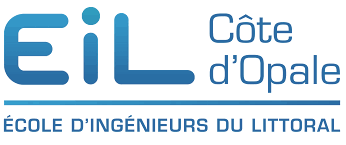

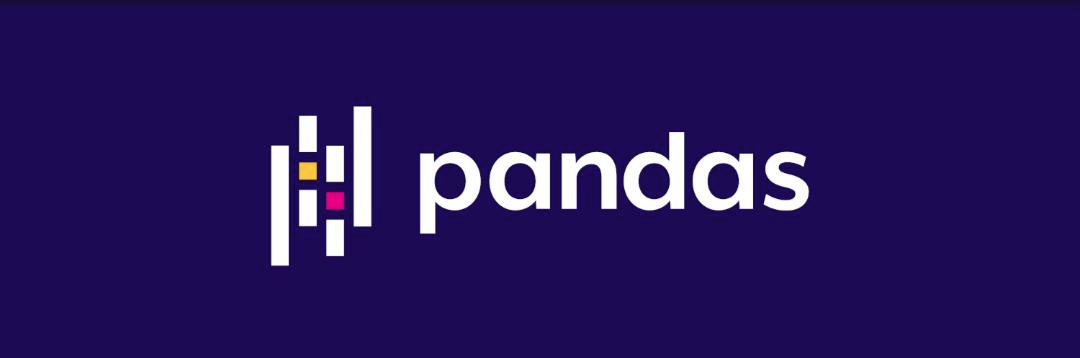


# Connaissance de pandas

# Les DataFrame

Nous allons continuer notre exploration de pandas en nous consacrant
cette fois aux DataFrames qui peuvent être vues comme un assemblage de
plusieurs Series.

Je vous propose de regarder un fichier en open data qui est le
référentiel des gares voyageurs de la SNCF. Ce fichier se trouve sur le
site Internet de données ouvertes de la SNCF
([https://ressources.data.sncf.com](https://ressources.data.sncf.com/)),
j'ai téléchargé la version du 4 décembre 2020 mais rien ne vous empêche
de charger la dernière version.

Les données dans le fichier ne sont pas séparées par un virgule mais par
un point-virgule d'où le l'attribut sep qui indique la qualité du
séparateur.


In [2]:
import pandas as pd

In [3]:
données = pd.read_csv('../data/referentiel-gares-voyageurs.csv', sep = ';')
données

Code plate-forme  Code UIC  Date fin validité plateforme  \
0             00006-1  87784884                           NaN   
1             00011-1  87784835                           NaN   
2             00014-1  87784801                           NaN   
3             00020-1  87784744                           NaN   
4             00022-1  87784728                           NaN   
...               ...       ...                           ...   
2862          03053-1  87113878                           NaN   
2863          03061-1  87113712                           NaN   
2864          03066-1  87113472                           NaN   
2865          03073-1  87111278                           NaN   
2866          03215-1  87697359                           NaN   

                        Intitulé plateforme  Code postal  Code Commune  \
0                         Ur - Les Escaldes        66760           218   
1                               Saillagouse        66800           167   
2                           Bolquère - Eyne        66210            27   
3                           Thuès les Bains        66360            36   
4                      Olette - Canaveilles        66360           125   
...                                     ...          ...           ...   
2862           Allée de la Tour Rendez-Vous        93320            77   
2863                        Val de Fontenay        94120            33   
2864  Le Raincy - Villemomble - Montfermeil        93340            62   
2865                        Porte de Clichy        75017            56   
2866                         Le Bourget T11        93350            13   

                 Commune  Code département          Département  Longitude  \
0                     Ur                66  Pyrénées-Orientales   1.940482   
1            Saillagouse                66  Pyrénées-Orientales   2.032113   
2              Cabanasse                66  Pyrénées-Orientales   2.087559   
3            Canaveilles                66  Pyrénées-Orientales   2.249094   
4                 Olette                66  Pyrénées-Orientales   2.271931   
...                  ...               ...                  ...        ...   
2862         Villemomble                93    Seine-Saint-Denis   2.506475   
2863  Fontenay-sous-Bois                94         Val-de-Marne   2.489097   
2864              Raincy                93    Seine-Saint-Denis   2.512062   
2865               Paris                75                Paris   2.314620   
2866             Bourget                93    Seine-Saint-Denis   2.423160   

      ...               Intitulé fronton de gare Gare DRG  Gare étrangère  \
0     ...                        Ur les Escaldes     True           False   
1     ...                            Saillagouse     True           False   
2     ...                        Bolquère - Eyne     True           False   
3     ...                        Thuès les Bains     True           False   
4     ...         Olette - Canaveilles les Bains     True           False   
...   ...                                    ...      ...             ...   
2862  ...           Allée de la Tour Rendez-Vous     True           False   
2863  ...                        Val de Fontenay     True           False   
2864  ...  Le Raincy - Villemomble - Montfermeil     True           False   
2865  ...                        Porte de Clichy     True           False   
2866  ...                         Le Bourget T11     True           False   

                                             DTG                  Région SNCF  \
0                                  DTG Grand Sud  REGION LANGUEDOC-ROUSSILLON   
1                                  DTG Grand Sud  REGION LANGUEDOC-ROUSSILLON   
2                                  DTG Grand Sud  REGION LANGUEDOC-ROUSSILLON   
3                                  DTG Grand Sud  REGION LANGUEDOC-ROUSSILLON   
4                                  DTG Grand Sud  REGION LANGUEDOC-R



## Le DataFrame

Après avoir vu l'élément de base qui est la série, le ou la DataFrame a
le même principe qu'une Séries mais cette fois-ci en deux dimensions

### Index et Colonnes

Comme pour une Series, une DataFrame a un index qui permet de donner un
nom à chaque colonne. Dans notre cas, et en l’absence d'informations
supplémentaires l'index des colonnes est une valeur numérique qui
commence à 0 et finit à 2866.

Mais comme on est maintenant dans un environnement à deux dimensions, on
a un deuxième index cette fois-ci pour les colonnes.

In [4]:
données.index

RangeIndex(start=0, stop=2867, step=1)

In [5]:
données.columns

Index(['Code plate-forme', 'Code UIC', 'Date fin validité plateforme',
       'Intitulé plateforme', 'Code postal', 'Code Commune', 'Commune',
       'Code département', 'Département', 'Longitude', 'Latitude',
       'Segment DRG', 'Niveau de service', 'RG', 'TVSs', 'SOPs', 'Gare',
       'Intitulé gare', 'Intitulé fronton de gare', 'Gare DRG',
       'Gare étrangère', 'DTG', 'Région SNCF', 'Unité gare', 'UT',
       'Nbre plateformes', 'TVS', 'WGS 84'],
      dtype='object')


Il est très facile de changer l'index d'une DataFrame avec la méthode
*setindex* :

In [4]:
données.set_index('Intitulé fronton de gare', inplace = True)
données

Code plate-forme  Code UIC  \
Intitulé fronton de gare                                           
Ur les Escaldes                                00006-1  87784884   
Saillagouse                                    00011-1  87784835   
Bolquère - Eyne                                00014-1  87784801   
Thuès les Bains                                00020-1  87784744   
Olette - Canaveilles les Bains                 00022-1  87784728   
...                                                ...       ...   
Allée de la Tour Rendez-Vous                   03053-1  87113878   
Val de Fontenay                                03061-1  87113712   
Le Raincy - Villemomble - Montfermeil          03066-1  87113472   
Porte de Clichy                                03073-1  87111278   
Le Bourget T11                                 03215-1  87697359   

                                       Date fin validité plateforme  \
Intitulé fronton de gare                                              
Ur les Escaldes                                                 NaN   
Saillagouse                                                     NaN   
Bolquère - Eyne                                                 NaN   
Thuès les Bains                                                 NaN   
Olette - Canaveilles les Bains                                  NaN   
...                                                             ...   
Allée de la Tour Rendez-Vous                                    NaN   
Val de Fontenay                                                 NaN   
Le Raincy - Villemomble - Montfermeil                           NaN   
Porte de Clichy                                                 NaN   
Le Bourget T11                                                  NaN   

                                                         Intitulé plateforme  \
Intitulé fronton de gare                                                       
Ur les Escaldes                                            Ur - Les Escaldes   
Saillagouse                                                      Saillagouse   
Bolquère - Eyne                                              Bolquère - Eyne   
Thuès les Bains                                              Thuès les Bains   
Olette - Canaveilles les Bains                          Olette - Canaveilles   
...                                                                      ...   
Allée de la Tour Rendez-Vous                    Allée de la Tour Rendez-Vous   
Val de Fontenay                                              Val de Fontenay   
Le Raincy - Villemomble - Montfermeil  Le Raincy - Villemomble - Montfermeil   
Porte de Clichy                                              Porte de Clichy   
Le Bourget T11                                                Le Bourget T11   

                                       Code postal  Code Commune  \
Intitulé fronton de gare                                           
Ur les Escaldes                              66760           218   
Saillagouse                                  66800           167   
Bolquère - Eyne                              66210            27   
Thuès les Bains                              66360            36   
Olette - Canaveilles les Bains               66360           125   
...                                            ...           ...   
Allée de la Tour Rendez-Vous                 93320            77   
Val de Fontenay                              94120            33   
Le Raincy - Villemomble - Montfermeil        93340            62   
Porte de Clichy                              75017            56   
Le Bourget T11                               93350            13   

                                                  Commune  Code département  \
Intitulé fronton de gare                                                      
Ur les Escaldes                                        Ur                66   
Saillagouse                                   Saillagouse         



et pour la lire de manière plus agréable, il ne nous reste plus qu'à
trier notre DataFrame en utilisant l'index :


In [7]:
données.sort_index()

Code plate-forme  Code UIC  \
Intitulé fronton de gare                              
Abancourt                         02266-1  87313759   
Abbaretz                          01604-1  87481614   
Abbeville                         02219-1  87317362   
Ablon                             01460-1  87545269   
Achiet                            02187-1  87342048   
...                                   ...       ...   
Évry                              00837-1  87681361   
Évry - Courcouronnes              00835-1  87681387   
NaN                               03231-1  87184408   
NaN                               03211-1  87672766   
NaN                               03219-1  87688887   

                          Date fin validité plateforme  \
Intitulé fronton de gare                                 
Abancourt                                          NaN   
Abbaretz                                           NaN   
Abbeville                                          NaN   
Ablon                                              NaN   
Achiet                                             NaN   
...                                                ...   
Évry                                               NaN   
Évry - Courcouronnes                               NaN   
NaN                                                NaN   
NaN                                                NaN   
NaN                                                NaN   

                                Intitulé plateforme  Code postal  \
Intitulé fronton de gare                                           
Abancourt                                 Abancourt        60220   
Abbaretz                                   Abbaretz        44170   
Abbeville                                 Abbeville        80100   
Ablon                               Ablon-sur-Seine        94480   
Achiet                              Achiet-le-Grand        62121   
...                                             ...          ...   
Évry                              Évry Val de Seine        91000   
Évry - Courcouronnes             Évry-Courcouronnes        91000   
NaN                                          Meroux        90400   
NaN                                        Sarrance        64490   
NaN                       Montpellier Sud de France        34000   

                          Code Commune          Commune  Code département  \
Intitulé fronton de gare                                                    
Abancourt                            1        Abancourt                60   
Abbaretz                             1         Abbaretz                44   
Abbeville                            1        Abbeville                80   
Ablon                                1  Ablon-sur-Seine                94   
Achiet                               5  Achiet-le-Grand                62   
...                                ...              ...               ...   
Évry                               228             Évry                91   
Évry - Courcouronnes               228             Évry                91   
NaN                                 68           Meroux                90   
NaN                                506         Sarrance                64   
NaN                                172      Montpellier                34   

                                    Département  Longitude  ...  \
Intitulé fronton de gare                                    ...   
Abancourt                                  Oise   1.774306  ...   
Abbaretz                       Loire-Atlantique  -1.524416  ...   
Abbeville                                 Somme   1.824490  ...   
Ablon                              Val-de-Marne   2.419151  ...   
Achiet                            Pas-de-Calais   2.780168  ...   
...                                         ...        ...  ...   
Évry                                    Essonne   2.452090  ...   
Évry - Courcouronnes                    Essonne   2.428581  ... 


## Construction des DataFrames

Tout comme les Series, il est possible de créer des dataFrame
directement dans pandas. La construction ressemble au principe de
construction des dictionnaires en python ; les clefs seront les colonnes
et les valeurs associées les colonnes.


In [8]:
mes_données = pd.DataFrame({'pays' : ['France', 'Allemagne', 'Maroc'],
                           'en europe' : [True, True, False],
                           'habitants' : [65,85,37]})

In [9]:
mes_données

pays  en europe  habitants
0     France       True         65
1  Allemagne       True         85
2      Maroc      False         37

In [11]:
mes_données.describe()

habitants
count   3.000000
mean   62.333333
std    24.110855
min    37.000000
25%    51.000000
50%    65.000000
75%    75.000000
max    85.000000


mais comme pandas traite souvent des tableaux de données de taille
importante, il dispose de plusieurs fonctions permettant de charger des
DataFrame :

-   *pd.read_csv*: lecture de fichiers CSV
-   *pd.read_excel*: lecture de ficiers excel
-   *pd.read_hdf*: fichiers hdf
-   *pd.read_sql*: BdD SQL
-   …




## Se familiariser avec ses données

Reprenons notre fichier sur les gares

In [5]:
données = pd.read_csv('../data/referentiel-gares-voyageurs.csv', sep = ';')


Comme ce fichier est très volumineux, tout comme dans les Series (2868
lignes), il est possible avec les commandes head() et tail() de
visualiser les premières ou dernières lignes de nos données.

Il existe une commande intéressante qui permet de récupérer des lignes
de manière aléatoire au sein de la base, la méthode sample() :


In [13]:
données.sample(5)

Code plate-forme  Code UIC  Date fin validité plateforme  \
839           01449-1  87545509                           NaN   
2559          01360-1  87575126                           NaN   
2025          01494-1  87540179                           NaN   
2830          02851-1  87172544                           NaN   
1319          00888-1  87671362                           NaN   

      Intitulé plateforme  Code postal  Code Commune              Commune  \
839          Saint-Chéron        91530           540         Saint-Chéron   
2559   Dangé-Saint-Romain        86220            92   Dangé-Saint-Romain   
2025     Dourdan La Forêt        91410           200              Dourdan   
2830                Liart         8290           254                Liart   
1319  Saint-Pé-de-Bigorre        65270           395  Saint-Pé-de-Bigorre   

      Code département      Département  Longitude  ...  \
839                 91          Essonne   2.125597  ...   
2559                86           Vienne   0.608775  ...   
2025                91          Essonne   1.994908  ...   
2830                 8         Ardennes   4.335514  ...   
1319                65  Hautes-Pyrénées  -0.161976  ...   

      Intitulé fronton de gare Gare DRG  Gare étrangère  \
839               Saint-Chéron     True           False   
2559        Dangé-Saint-Romain     True           False   
2025          Dourdan la Forêt     True           False   
2830                     Liart     True           False   
1319       Saint-Pé-de-Bigorre     True           False   

                                             DTG  \
839   Direction Générale des Gares Île-de-France   
2559                      DTG Nouvelle Aquitaine   
2025  Direction Générale des Gares Île-de-France   
2830                               DTG Grand Est   
1319                               DTG Grand Sud   

                            Région SNCF                      Unité gare  \
839         REGION DE PARIS RIVE GAUCHE                             NaN   
2559  REGION POITOU-CHARENTES AQUITAINE             UG Poitou-Charentes   
2025        REGION DE PARIS RIVE GAUCHE                             NaN   
2830           REGION CHAMPAGNE-ARDENNE                    UG Champagne   
1319               REGION MIDI PYRENEES  UG Toulouse Occitanie Pyrénées   

                                   UT Nbre plateformes  TVS  \
839                 SAINT CHERON GARE                1  SCW   
2559                     DANGE P GARE                1  DGE   
2025                     DOURDAN GARE                1  DAQ   
2830                       LIART GARE                1  LIR   
1319  SAINT PE (HAUTES PYRENEES) GARE                1  XPE   

                     WGS 84  
839      48.551188,2.125597  
2559   46.9378397,0.6087754  
2025     48.535314,1.994908  
2830   49.7700597,4.3355138  
1319  43.1015768,-0.1619763  

[5 rows x 28 columns]


Comme pour une Series, la commande len() donne le nombre de lignes, pour
avoir le nombre de colonnes, il faut utiliser l'attribut colums de la
base :

In [15]:
len(données.columns)

28


Il est possible d'utiliser les commandes dtypes afin de connaître les
types de données de notre DataFrame et describe() qui donne des
informations numériques (sur les colonnes à valeur numérique bien sûr)

In [16]:
données.describe()

Code UIC  Date fin validité plateforme   Code postal  Code Commune  \
count  2.867000e+03                           0.0   2867.000000   2867.000000   
mean   8.749419e+07                           NaN  53109.605162    231.371120   
std    2.036322e+05                           NaN  26277.865673    181.668411   
min    8.700148e+07                           NaN   1000.000000      1.000000   
25%    8.731381e+07                           NaN  31835.000000     81.000000   
50%    8.749121e+07                           NaN  58800.000000    188.000000   
75%    8.768441e+07                           NaN  74510.000000    336.500000   
max    8.798872e+07                           NaN  95880.000000    907.000000   

       Code département    Longitude     Latitude  Niveau de service  SOPs  \
count       2867.000000  2863.000000  2863.000000        2455.000000   0.0   
mean          52.745378     2.816342    47.188418           1.110387   NaN   
std           26.264106     2.641508     2.159540           0.354897   NaN   
min            1.000000    -4.478903    42.419967           1.000000   NaN   
25%           31.000000     1.276114    45.546862           1.000000   NaN   
50%           58.000000     2.501897    47.633284           1.000000   NaN   
75%           74.000000     4.824696    48.897603           1.000000   NaN   
max           95.000000     8.182682    51.030470           3.000000   NaN   

       Nbre plateformes  
count       2867.000000  
mean           1.010115  
std            0.127659  
min            1.000000  
25%            1.000000  
50%            1.000000  
75%            1.000000  
max            4.000000

La moyenne du code postal n'est effectivement pas une information très
pertinente.

Si vous voulez mettre les noms de colonnes dans une véritable liste
python, hop un petit script :

In [17]:
mes_colonnes = [x for x in données.columns]
mes_colonnes

['Code plate-forme',
 'Code UIC',
 'Date fin validité plateforme',
 'Intitulé plateforme',
 'Code postal',
 'Code Commune',
 'Commune',
 'Code département',
 'Département',
 'Longitude',
 'Latitude',
 'Segment DRG',
 'Niveau de service',
 'RG',
 'TVSs',
 'SOPs',
 'Gare',
 'Intitulé gare',
 'Intitulé fronton de gare',
 'Gare DRG',
 'Gare étrangère',
 'DTG',
 'Région SNCF',
 'Unité gare',
 'UT',
 'Nbre plateformes',
 'TVS',
 'WGS 84']


## Récupérer des éléments d'un DataFrame

Un peu comme avec les Series, les DataFrames utilisent une version
généralisée de loc, iloc et des tests logiques

### iloc

iloc correspond à index location. Ici, pour récupérer une données
précise, on utilisera donc, le numéro de la ligne et celui de la
colonne :


In [18]:
données.iloc[2,6]

'Cabanasse'


Il est tout à fait possible de récupérer des tranches de données en
utilisant les **:**.

Si l'on veut toutes les colonnes, il faut comme avec numpy
utiliser **:**

Par exemple, pour obtenir les trois premières lignes avec toutes les
colonnes :

In [19]:
données.iloc[0:2,:]

Code plate-forme  Code UIC  Date fin validité plateforme  \
0          00006-1  87784884                           NaN   
1          00011-1  87784835                           NaN   

  Intitulé plateforme  Code postal  Code Commune      Commune  \
0   Ur - Les Escaldes        66760           218           Ur   
1         Saillagouse        66800           167  Saillagouse   

   Code département          Département  Longitude  ...  \
0                66  Pyrénées-Orientales   1.940482  ...   
1                66  Pyrénées-Orientales   2.032113  ...   

   Intitulé fronton de gare Gare DRG  Gare étrangère            DTG  \
0           Ur les Escaldes     True           False  DTG Grand Sud   
1               Saillagouse     True           False  DTG Grand Sud   

                   Région SNCF        Unité gare                    UT  \
0  REGION LANGUEDOC-ROUSSILLON  UG Est Occitanie  UR LES ESCALDES GARE   
1  REGION LANGUEDOC-ROUSSILLON  UG Est Occitanie      SAILLAGOUSE GARE   

  Nbre plateformes  TVS                WGS 84  
0                1  URL   42.457481,1.9404821  
1                1  SGW  42.4568855,2.0321126  

[2 rows x 28 columns]

### loc

Tout comme dans les Series, loc se généralise dans le cas des DataFrame.

In [20]:
données.loc[1, 'Commune']

'Saillagouse'



Remarquez bien qu’ici le 1 correspond à l’index de la ligne pas le
numéro et que si on change l’index des lignes de notre DataFrame, il
faudrait également changer l’index :


In [21]:
données.set_index('Intitulé fronton de gare', inplace= True)
données.loc['Saillagouse','Commune']

'Saillagouse'

Il est possible d’obtenir des tranches du DataFrame comme pour une
Series :

In [26]:
données.loc['Ur les Escaldes':'Thuès les Bains', 'Commune']

Intitulé fronton de gare
Ur les Escaldes             Ur
Saillagouse        Saillagouse
Bolquère - Eyne      Cabanasse
Thuès les Bains    Canaveilles
Name: Commune, dtype: object


*Note importante*: le fonctionnement de pandas est un peu différent de
celui de python où lorsqu’on travaille sur une tranche, on n’a pas
l’extrémité (par exemple sur les chaînes de caractère)

*Note 2* :

Si l’on passe un unique argument à la méthode loc, pandas considérera
que l’on travaille sur les lignes



### Les fonctions logiques

L’utilisation des fonctions logiques et booléennes est très utilisée
dans le traitement des DataFrame, il y a plusieurs éléments à
considérer :

1.  si un tableau de booléens est fourni à loc, il considérera que ce
    sont les lignes
2.  si le tableau de booléens a un Index (c’est une Series),
    l’alignement se fera sur les valeurs de la colonne correspondant à
    l’index
3.  pour faire un test sur les colonnes, il faudra utiliser **.loc[:,test]**

Mais quelques exemples valent mieux qu’une longue explication :

In [6]:
données_triées = données.sort_values('Code Commune')
données_triées.head(5)

Code plate-forme  Code UIC  Date fin validité plateforme  \
2021          01460-1  87545269                           NaN   
985           02207-1  87319012                           NaN   
1795          00291-1  87751404                           NaN   
1356          01076-1  87597708                           NaN   
2534          01223-1  87586008                           NaN   

      Intitulé plateforme  Code postal  Code Commune          Commune  \
2021      Ablon-sur-Seine        94480             1  Ablon-sur-Seine   
985   Aix-en-Provence TGV        13592             1  Aix-en-Provence   
1795      Aix-en-Provence        13100             1  Aix-en-Provence   
1356   Busseau sur Creuse        23150             1             Ahun   
2534                 Agen        47000             1             Agen   

      Code département       Département  Longitude  ...  \
2021                94      Val-de-Marne   2.419151  ...   
985                 13  Bouches-du-Rhône   5.317534  ...   
1795                13  Bouches-du-Rhône   5.445345  ...   
1356                23            Creuse   2.022924  ...   
2534                47    Lot-et-Garonne   0.620932  ...   

      Intitulé fronton de gare Gare DRG  Gare étrangère  \
2021                     Ablon     True           False   
985        Aix-en-Provence TGV     True           False   
1795           Aix-en-Provence     True           False   
1356        Busseau sur Creuse     True           False   
2534                      Agen     True           False   

                                             DTG  \
2021  Direction Générale des Gares Île-de-France   
985                                DTG Grand Sud   
1795                               DTG Grand Sud   
1356                      DTG Nouvelle Aquitaine   
2534                      DTG Nouvelle Aquitaine   

                            Région SNCF       Unité gare  \
2021        REGION DE PARIS RIVE GAUCHE              NaN   
985   REGION PROVENCE ALPES COTE D'AZUR        UG LGV PA   
1795  REGION PROVENCE ALPES COTE D'AZUR  UG Régionale PA   
1356                    REGION LIMOUSIN      UG Limousin   
2534  REGION POITOU-CHARENTES AQUITAINE     UG Aquitaine   

                                   UT Nbre plateformes  TVS  \
2021                       ABLON GARE                1  ABL   
985   AIX TGV P GARE PLATEAU D ARBOIS                1  AXV   
1795             AIX EN PROVENCE GARE                1  AXP   
1356          BUSSEAU SUR CREUSE GARE                1  BUC   
2534                        AGEN GARE                1  AGN   

                    WGS 84  
2021    48.725468,2.419151  
985     43.455237,5.317534  
1795    43.522912,5.445345  
1356  46.1230257,2.0229244  
2534    44.208311,0.620932  

[5 rows x 28 columns]

In [7]:
données_triées['Code département']

2021    94
985     13
1795    13
1356    23
2534    47
        ..
424      2
2165    62
1576    62
1586    62
389     62
Name: Code département, Length: 2867, dtype: int64

ici on obtient une Series, cas n°2 on s’aligne sur les valeurs de la
colonne

In [8]:
données_triées[données_triées['Code département'] > 75]

Code plate-forme  Code UIC  Date fin validité plateforme  \
2021          01460-1  87545269                           NaN   
782           01171-1  87592667                           NaN   
403           02219-1  87317362                           NaN   
2467          00844-1  87681155                           NaN   
2526          01186-1  87592311                           NaN   
...               ...       ...                           ...   
2101          01868-1  87411447                           NaN   
921           01857-1  87413336                           NaN   
1590          02252-1  87316125                           NaN   
2095          01853-1  87413385                           NaN   
413           02289-1  87313437                           NaN   

               Intitulé plateforme  Code postal  Code Commune  \
2021               Ablon-sur-Seine        94480             1   
782                Aixe-sur-Vienne        87700             1   
403                      Abbeville        80100             1   
2467  Maisons-Alfort - Alfortville        94700             2   
2526                       Ambazac        87240             2   
...                            ...          ...           ...   
2101      Longuerue - Vieux-Manoir        76750           738   
921          Virville - Manneville        76110           747   
1590                 Thézy-Glimont        80110           752   
2095                        Yvetot        76190           758   
413             Villers-Bretonneux        80380           799   

                 Commune  Code département     Département  Longitude  ...  \
2021     Ablon-sur-Seine                94    Val-de-Marne   2.419151  ...   
782      Aixe-sur-Vienne                87    Haute-Vienne   1.145689  ...   
403            Abbeville                80           Somme   1.824490  ...   
2467         Alfortville                94    Val-de-Marne   2.426977  ...   
2526             Ambazac                87    Haute-Vienne   1.406501  ...   
...                  ...               ...             ...        ...  ...   
2101        Vieux-Manoir                76  Seine-Maritime   1.276228  ...   
921             Virville                76  Seine-Maritime   0.354161  ...   
1590       Thézy-Glimont                80           Somme   2.435931  ...   
2095              Yvetot                76  Seine-Maritime   0.750115  ...   
413   Villers-Bretonneux                80           Somme   2.521410  ...   

          Intitulé fronton de gare Gare DRG  Gare étrangère  \
2021                         Ablon     True           False   
782                Aixe-sur-Vienne     True           False   
403                      Abbeville     True           False   
2467  Maisons-Alfort - Alfortville     True           False   
2526                       Ambazac     True           False   
...                            ...      ...             ...   
2101      Longuerue - Vieux-Manoir     True           False   
921          Virville - Manneville     True           False   
1590                 Thézy-Glimont     True           False   
2095                        Yvetot     True           False   
413             Villers-Bretonneux     True           False   

                                             DTG                  Région SNCF  \
2021  Direction Générale des Gares Île-de-France  REGION DE PARIS RIVE GAUCHE   
782                       DTG Nouvelle Aquitaine              REGION LIMOUSIN   
403              DTG Hauts de France - Normandie              REGION PICARDIE   
2467  Direction Générale des Gares Île-de-France      REGION DE PARIS-SUD-EST   
2526                      DTG Nouvelle Aquitaine              REGION LIMOUSIN   
...                                          ...                          ...   
2101             DTG Hauts de France - Normandie             REGION NORMANDIE   
921              DTG Hauts de France - Normandie             REGION NORMANDIE   
1590             DTG



Pour un tableau de booléens sans index, on crée une liste de booléens
dont la taille est égale au nombre de lignes du DataFrame


In [10]:
import random

def alea():
    if random.randint(0,1) == 0:
        return True
    else:
        return False

tab = [alea() for x in range(len(données_triées))]


Et on applique la règle n°1 :

In [11]:
# données_triées.loc[tab]
données_triées[tab]

Code plate-forme  Code UIC  Date fin validité plateforme  \
2534          01223-1  87586008                           NaN   
782           01171-1  87592667                           NaN   
403           02219-1  87317362                           NaN   
2604          01604-1  87481614                           NaN   
2390          00448-1  87734129                           NaN   
...               ...       ...                           ...   
2197          02334-1  87296608                           NaN   
413           02289-1  87313437                           NaN   
1606          02330-1  87297051                           NaN   
2165          02156-1  87342576                           NaN   
1586          02232-1  87317123                           NaN   

     Intitulé plateforme  Code postal  Code Commune             Commune  \
2534                Agen        47000             1                Agen   
782      Aixe-sur-Vienne        87700             1     Aixe-sur-Vienne   
403            Abbeville        80100             1           Abbeville   
2604            Abbaretz        44170             1            Abbaretz   
2390          Aigueperse        63260             1          Aigueperse   
...                  ...          ...           ...                 ...   
2197            Versigny         2800           788            Versigny   
413   Villers-Bretonneux        80380           799  Villers-Bretonneux   
1606       Viry-Noureuil         2300           820       Viry-Noureuil   
2165                Vimy        62580           861                Vimy   
1586  Wimille - Wimereux        62126           893            Wimereux   

      Code département       Département  Longitude  ...  \
2534                47    Lot-et-Garonne   0.620932  ...   
782                 87      Haute-Vienne   1.145689  ...   
403                 80             Somme   1.824490  ...   
2604                44  Loire-Atlantique  -1.524416  ...   
2390                63       Puy-de-Dôme   3.198262  ...   
...                ...               ...        ...  ...   
2197                 2             Aisne   3.433569  ...   
413                 80             Somme   2.521410  ...   
1606                 2             Aisne   3.250361  ...   
2165                62     Pas-de-Calais   2.822955  ...   
1586                62     Pas-de-Calais   1.613746  ...   

      Intitulé fronton de gare Gare DRG  Gare étrangère  \
2534                      Agen     True           False   
782            Aixe-sur-Vienne     True           False   
403                  Abbeville     True           False   
2604                  Abbaretz     True           False   
2390                Aigueperse     True           False   
...                        ...      ...             ...   
2197                  Versigny     True           False   
413         Villers-Bretonneux     True           False   
1606             Viry-Noureuil     True           False   
2165                      Vimy     True           False   
1586        Wimille - Wimereux     True           False   

                                  DTG                        Région SNCF  \
2534           DTG Nouvelle Aquitaine  REGION POITOU-CHARENTES AQUITAINE   
782            DTG Nouvelle Aquitaine                    REGION LIMOUSIN   
403   DTG Hauts de France - Normandie                    REGION PICARDIE   
2604                 DTG Centre Ouest            REGION PAYS DE LA LOIRE   
2390       DTG Centre Est Rhône Alpin                    REGION AUVERGNE   
...                               ...                                ...   
2197  DTG Hauts de France - Normandie                    REGION PICARDIE   
413   DTG Hauts de France - Normandie                    REGION PICARDIE   
1606  DTG Hauts de France - Normandie                    REGION PICARDIE   
2165  DTG Hauts de France - Normandie          REGION NORD PAS DE CALAIS   
1586  DTG Hauts de France - Normandie          REGION NOR



Note sur les crochets :

Il est possible d’utiliser les crochets sans loc et iloc. Le résultat de
l’exécution sera dans ce cas le suivant :

-   si on met une colonne ou une liste de colonnes, ces colonnes seront
    retournées
-   si on entre une tranche (ie **[ : ]**), cela revient à
    sélectionner les index comme avec iloc


### Les DataFrames : une collection de Series

Extraire une colonne d’un DataFrame la transforme en Series, extraire
une liste de colonnes donne un DataFrame (ce qui peut semble logique).
Attention, cependant à la notation

In [13]:
les_départements = données['Code département']
type(les_départements)

pandas.core.series.Series

In [14]:
plusieurs_colonnes = données[['Département','Longitude']]
type(plusieurs_colonnes)

pandas.core.frame.DataFrame


## Les exercices



Prenez maintenant votre notebook ou éditeur préféré et reprenez le
fichier fourni par la SNCF sur les gares

1.  combien y a-t-il de lignes dans le fichier ?

2.  Combien y a-t-il de colonnes dans le fichier ?

3.  Lorsque vous faîtes données.columns, pandas n’affiche pas toutes les
    colonnes sous forme d’une liste mais sous la forme d’un Index
    pandas. Écrire un script python qui donne les labels des colonnes
    sous formes de listes

4.  Comme vous pouvez le constater , le nombre de colonnes est très
    important, nous allons réduire notre base aux colonnes les plus
    intéressantes.. Je vous propose de reprendre une base avec les
    colonnes suivantes 'Commune', 'Département', 'Longitude',
    'Latitude', 'Intitulé fronton de gare', 'Nbre plateformes'  
      

5.  Pour avoir une idée des données que nous sommes en train d'examiner,
    utiliser une commande qui vous donne un échantillon de 20 lignes  
    Comme vous pouvez le voir, la colonne Nbe_plateformes ne semble pas
    contenir d'informations pertinentes. Utilisez la méthode
    value_counts(), qu'en déduisez-

    vous ?  

6.   Supprimer cette colonne 'Nbre plateformes »  
      

In [15]:
données['Latitude'].describe()

count    2863.000000
mean       47.188418
std         2.159540
min        42.419967
25%        45.546862
50%        47.633284
75%        48.897603
max        51.030470
Name: Latitude, dtype: float64

7. Quelle est la latitude la plus élevées de toutes les gares ?

In [16]:
données[(données['Département'] == 'Nord') | (données['Département'] == 'Pas-de-Calais')]

Code plate-forme  Code UIC  Date fin validité plateforme  \
385           02109-1  87345587                           NaN   
386           02111-1  87345553                           NaN   
387           02112-1  87345546                           NaN   
388           02118-1  87345413                           NaN   
389           02127-1  87345256                           NaN   
...               ...       ...                           ...   
2749          02419-1  87286146                           NaN   
2750          02423-1  87286005                           NaN   
2753          02434-1  87281402                           NaN   
2754          02436-1  87281311                           NaN   
2755          02442-1  87281105                           NaN   

      Intitulé plateforme  Code postal  Code Commune              Commune  \
385           Cattenières        59217           138          Cattenières   
386                Bertry        59980            74               Bertry   
387               Maurois        59980           394              Maurois   
388                Cantin        59169           126               Cantin   
389            Libercourt        62820           907           Libercourt   
...                   ...          ...           ...                  ...   
2749          Armentières        59280            17          Armentières   
2750       Lille Flandres        59000           350                Lille   
2753  Coudekerque-Branche        59210           155  Coudekerque-Branche   
2754        Grande-Synthe        59760           271        Grande-Synthe   
2755              Bergues        59380            67              Bergues   

      Code département    Département  Longitude  ...  \
385                 59           Nord   3.333788  ...   
386                 59           Nord   3.448996  ...   
387                 59           Nord   3.456255  ...   
388                 59           Nord   3.121943  ...   
389                 62  Pas-de-Calais   3.008670  ...   
...                ...            ...        ...  ...   
2749                59           Nord   2.877630  ...   
2750                59           Nord   3.069870  ...   
2753                59           Nord   2.375142  ...   
2754                59           Nord   2.313355  ...   
2755                59           Nord   2.425740  ...   

      Intitulé fronton de gare Gare DRG  Gare étrangère  \
385                Cattenières     True           False   
386                     Bertry     True           False   
387                    Maurois     True           False   
388                     Cantin     True           False   
389                 Libercourt     True           False   
...                        ...      ...             ...   
2749               Armentières     True           False   
2750            Lille Flandres     True           False   
2753       Coudekerque-Branche     True           False   
2754             Grande-Synthe     True           False   
2755                   Bergues     True           False   

                                  DTG                Région SNCF  \
385   DTG Hauts de France - Normandie  REGION NORD PAS DE CALAIS   
386   DTG Hauts de France - Normandie  REGION NORD PAS DE CALAIS   
387   DTG Hauts de France - Normandie            REGION PICARDIE   
388   DTG Hauts de France - Normandie  REGION NORD PAS DE CALAIS   
389   DTG Hauts de France - Normandie  REGION NORD PAS DE CALAIS   
...                               ...                        ...   
2749  DTG Hauts de France - Normandie  REGION NORD PAS DE CALAIS   
2750  DTG Hauts de France - Normandie  REGION NORD PAS DE CALAIS   
2753  DTG Hauts de France - Normandie  REGION NORD PAS DE CALAIS   
2754  DTG Hauts de France - Normandie  REGION NORD PAS DE CALAIS   
2755  DTG Hauts de France - Normandie  REGION NORD PAS DE CALAIS   

                 Unité gare                          UT Nbre plateformes  TVS  \
385   U


    

8.  
    Quelle est la latitude la plus importante des départements du nord
    et du pas de Calais ?